In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('NSE_data_all_stocks_2016.csv')

In [3]:
data.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,4-Jan-16,EGAD,Eaagads Ltd,8.2,14,25,25,25,26.75,-1.75,6.54%,400,NaN
1,4-Jan-16,KUKZ,Kakuzi Plc,300,423.5,317,348,332,317,15.00,4.73%,200,NaN
2,4-Jan-16,KAPC,Kapchorua Tea Kenya Plc,59,95,200,200,200,200,NaN,NaN,800,100.0
3,4-Jan-16,LIMT,Limuru Tea Plc,385,475,"1,085.00","1,085.00","1,085.00","1,085.00",NaN,NaN,NaN,NaN
4,4-Jan-16,SASN,Sasini Plc,14.8,19.6,19.5,19.5,19.5,19.55,-0.05,0.26%,700,NaN


In [4]:
data.tail()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
16795,30-Dec-16,^FNK15,FTSE NSE Kenya 15 Index,154.41,227.73,158.64,163.02,161.6,158.85,2.75,1.73%,NaN,NaN
16796,30-Dec-16,^FNK25,FTSE NSE Kenya 25 Index,162.87,238.71,163.21,167.38,166.2,163.41,2.79,1.71%,NaN,NaN
16797,30-Dec-16,^N20I,NSE 20-Share Index,"1,873.47","2,766.77","3,186.21","3,186.21","3,186.21","3,130.93",55.28,1.77%,NaN,NaN
16798,30-Dec-16,^N25I,NSE 25-Share Index,"2,943.60","4,207.90","3,530.07","3,530.07","3,530.07","3,455.66",74.41,2.15%,NaN,NaN
16799,30-Dec-16,^NASI,NSE All-Share Index,124.3,171.36,133.34,133.34,133.34,131.47,1.87,1.42%,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       16800 non-null  object 
 1   CODE       16800 non-null  object 
 2   NAME       16800 non-null  object 
 3   12m Low    16800 non-null  object 
 4   12m High   16800 non-null  object 
 5   Day Low    16800 non-null  object 
 6   Day High   16800 non-null  object 
 7   Day Price  16800 non-null  object 
 8   Previous   16799 non-null  object 
 9   Change     10839 non-null  float64
 10  Change%    10834 non-null  object 
 11  Volume     12427 non-null  object 
 12  Adjust     2445 non-null   float64
dtypes: float64(2), object(11)
memory usage: 1.7+ MB


In [6]:
data.isnull()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,False,False,False,False,False,False,False,False,False,False,False,True,True
16796,False,False,False,False,False,False,False,False,False,False,False,True,True
16797,False,False,False,False,False,False,False,False,False,False,False,True,True
16798,False,False,False,False,False,False,False,False,False,False,False,True,True


In [7]:
data.isnull().sum()

DATE             0
CODE             0
NAME             0
12m Low          0
12m High         0
Day Low          0
Day High         0
Day Price        0
Previous         1
Change        5961
Change%       5966
Volume        4373
Adjust       14355
dtype: int64

In [8]:
#fill missing values with 0
df = data.fillna(0)
df

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,4-Jan-16,EGAD,Eaagads Ltd,8.2,14,25,25,25,26.75,-1.75,6.54%,400,0.0
1,4-Jan-16,KUKZ,Kakuzi Plc,300,423.5,317,348,332,317,15.00,4.73%,200,0.0
2,4-Jan-16,KAPC,Kapchorua Tea Kenya Plc,59,95,200,200,200,200,0.00,0,800,100.0
3,4-Jan-16,LIMT,Limuru Tea Plc,385,475,"1,085.00","1,085.00","1,085.00","1,085.00",0.00,0,0,0.0
4,4-Jan-16,SASN,Sasini Plc,14.8,19.6,19.5,19.5,19.5,19.55,-0.05,0.26%,700,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,30-Dec-16,^FNK15,FTSE NSE Kenya 15 Index,154.41,227.73,158.64,163.02,161.6,158.85,2.75,1.73%,0,0.0
16796,30-Dec-16,^FNK25,FTSE NSE Kenya 25 Index,162.87,238.71,163.21,167.38,166.2,163.41,2.79,1.71%,0,0.0
16797,30-Dec-16,^N20I,NSE 20-Share Index,"1,873.47","2,766.77","3,186.21","3,186.21","3,186.21","3,130.93",55.28,1.77%,0,0.0
16798,30-Dec-16,^N25I,NSE 25-Share Index,"2,943.60","4,207.90","3,530.07","3,530.07","3,530.07","3,455.66",74.41,2.15%,0,0.0


In [9]:
df.isnull().sum()

DATE         0
CODE         0
NAME         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Adjust       0
dtype: int64

In [10]:
df['NAME'].value_counts()

Eaagads Ltd                             248
KenolKobil Ltd                          248
KPLC-P4                                 248
KPLC-P7                                 248
Kenya Power and Lighting Company Plc    248
                                       ... 
NSE 25-Share Index                      247
NSE 20-Share Index                      223
NSE All-Share Index                     223
Nairobi Business Ventures Ltd           132
Deacons (East Africa) Plc               103
Name: NAME, Length: 69, dtype: int64

Text(0, 0.5, 'Adjust')

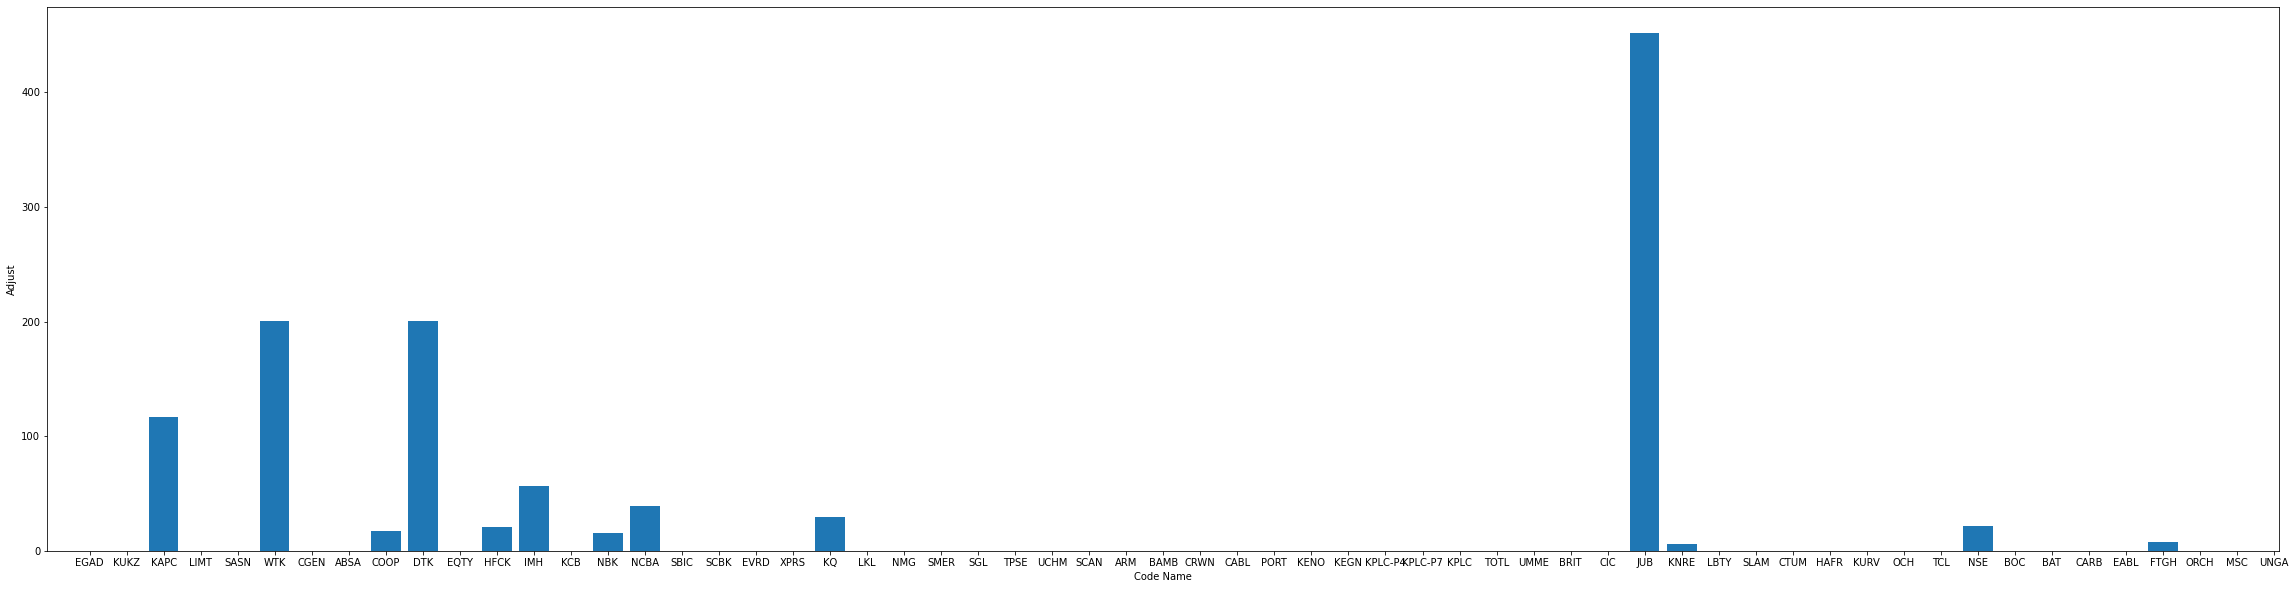

In [11]:
plt.figure(figsize = (40,10))
plt.bar(data['CODE'], data['Adjust'])
plt.xlabel('Code Name')
plt.ylabel('Adjust')

Text(0, 0.5, 'Change')

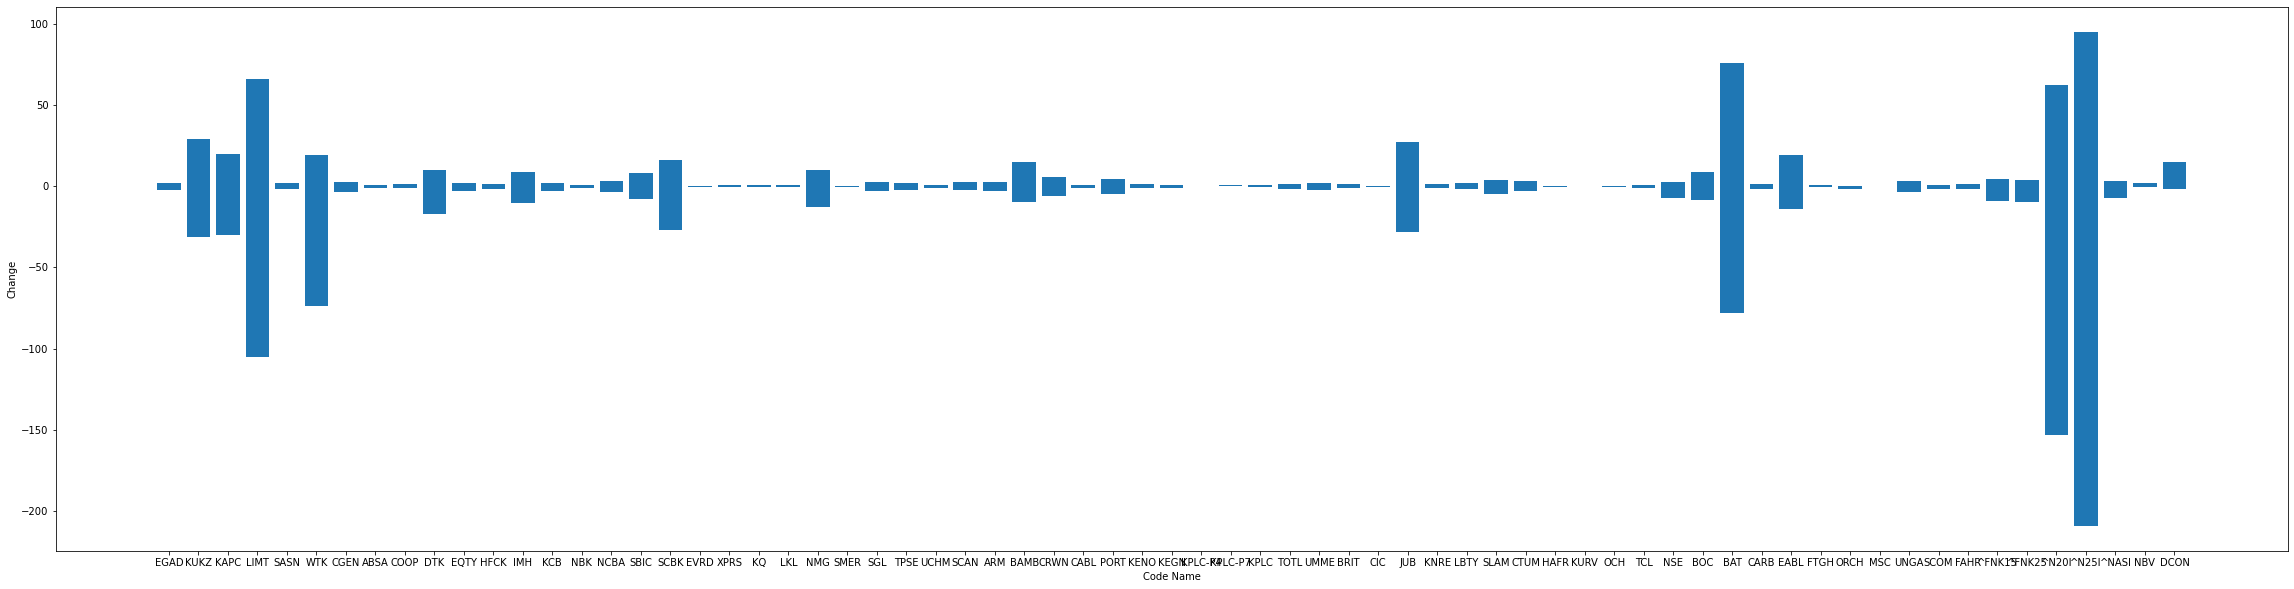

In [12]:
plt.figure(figsize = (40,10))
plt.bar(data['CODE'], data['Change'])
plt.xlabel('Code Name')
plt.ylabel('Change')

In [13]:
df.dtypes

DATE          object
CODE          object
NAME          object
12m Low       object
12m High      object
Day Low       object
Day High      object
Day Price     object
Previous      object
Change       float64
Change%       object
Volume        object
Adjust       float64
dtype: object